# k-Nearest Neighbors

**k-nearest neighbors (kNN)** is a type of *supervised learning* algorithm used for both regression and classification. 
kNN tries to predict the correct class / target value for the test data by calculating the distance between the test data and all the training points. 
Then, it selects the `k` number of points which are closest to the test data. 
In the case of classification, it takes the majority class as a prediction amongst the `k` nearest training examples.
In the case of regression, the predicted target value is the mean of the `k` selected training points.

![knn-example](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')  # use ggplot styles for matplotlib figures

color_palette = {
     'crimson': '#a50026', 
     'red': '#d73027',
     'redorange': '#f46d43', 
     'orange': '#fdae61',
     'yellow': '#fee090', 
     'sky': '#e0f3f8',
     'babyblue': '#abd9e9', 
     'lightblue': '#74add1',
     'blue': '#4575b4', 
     'purple': '#313695'
}

In [3]:
PATH = '../data/iris.csv'

In [4]:
!ls '../data'  # to execute bash command in the notebook we are using '!' mark
!wc -l {PATH}  # we can even use python variables but we need '{' '}' braces
!du -h {PATH}

iris.csv  rent.csv
150 ../data/iris.csv
8,0K	../data/iris.csv


In [5]:
!head -n 5 {PATH} # shows first 5 file rows

Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
!tail -n 5 {PATH} # shows last 5 file rows

146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica

## A. k-Nearest Neighbors in `sklearn`

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### A.1 Loading and Inspecting Data

In [8]:
data_frame_iris = pd.read_csv(filepath_or_buffer = PATH)
data_frame_iris.head() # shows first 5 rows

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data_frame_iris['ClassLabels'] = data_frame_iris['Species'].map(label_mapping)

data_frame_iris.tail() # shows last 5 rows

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species,ClassLabels
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [10]:
X = data_frame_iris[['SepalLength[cm]', 'SepalWidth[cm]', 'PetalLength[cm]', 'PetalWidth[cm]']].values
y = data_frame_iris['ClassLabels'].values

print(f'Training set shape: {X.shape}. Labels shape: {y.shape}')

Training set shape: (150, 4). Labels shape: (150,)


### A.2 Creating Training and Testing Sets

In order to divide the data set into a training and a test set, we are going to shuffle the data set first.
This is necessary because in the initial set of classes they are placed in the order from the first to the last.
If we were to train a model by taking let's say the first 100 examples as a training set, then the classifier would never see the third class, so we have to mix the data to avoid this.
For illustration purposes, we will do this in multiple steps.

In [11]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [12]:
random = np.random.RandomState(100)
shuffled_indices = random.permutation(indices)
shuffled_indices

array([128,  11, 118,  15, 123, 135,  32,   1, 116,  45,  40, 115,  26,
        28, 145,  97,  62,  77, 122, 112, 125,  31, 146,  29,  69, 149,
        75,  20,  73, 120,  81,  99, 119,  12,  16,  51,  46,  89, 136,
       114,  41,  90, 102, 109,  37,   6,  25,  21,  92,   9,  23,  35,
        54, 131, 127,  84, 111,  96, 117, 110,  82,  22, 139, 124, 133,
        33,  42, 101,   5,  36,  43,  52, 104, 144, 134,  10,  85,  70,
         3,  76,  57, 126,   0,  78,  88,  83,  50,  68,  95, 132, 113,
        13,  72,  17,  74, 129, 137, 106,  64,  18,  44,  38,  39, 121,
        48,  30,  56,  27, 140,  63, 141,  19, 142, 105,   2,  80,  71,
        55, 143,  61,  65,  47,  49,   7, 147,  59,  91,   4, 100, 108,
       130,  86,  93,  58,  60, 107, 148,  34,  14,  66,  53,  98,  94,
       138,  79,  87, 103,  67,  24,   8])

Now that we have the shuffled indices, we can use them to shuffle both the features `X` and classes `y` relative to each other.
We do this to preserve the correspondence between features and labels in `X` and `y`:

In [13]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

In [14]:
X_train, X_test = X_shuffled[:105], X_shuffled[105:]
y_train, y_test = y_shuffled [:105], y_shuffled [105:]

print(f'Training shape (features): {X_train.shape}. Test shape (features): {X_test.shape}')
print(f'Training shape (labels): {y_train.shape}. Test shape (labels): {y_test.shape}')

Training shape (features): (105, 4). Test shape (features): (45, 4)
Training shape (labels): (105,). Test shape (labels): (45,)


We could have achieved the exact same result using the `sklearn`'s function `train_test_split`:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle = True)

print(f'Training shape (features): {X_train.shape}. Test shape (features): {X_test.shape}')
print(f'Training shape (labels): {y_train.shape}. Test shape (labels): {y_test.shape}')

Training shape (features): (105, 4). Test shape (features): (45, 4)
Training shape (labels): (105,). Test shape (labels): (45,)


### A.3 Plotting the Data

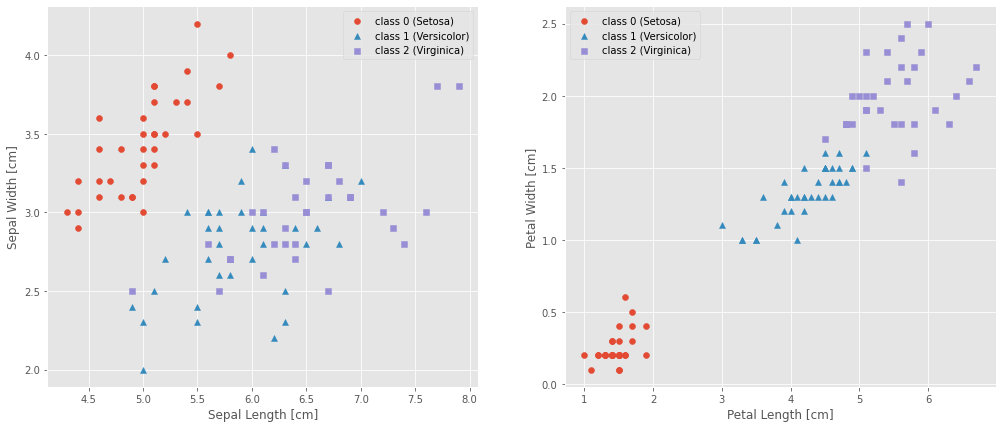

In [16]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 7))

axes[0].scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

axes[0].scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

axes[0].scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

axes[0].set_xlabel('Sepal Length [cm]')
axes[0].set_ylabel('Sepal Width [cm]')
axes[0].legend()

axes[1].scatter(X_train[y_train == 0, 2],
            X_train[y_train == 0, 3],
            marker='o',
            label='class 0 (Setosa)')

axes[1].scatter(X_train[y_train == 1, 2],
            X_train[y_train == 1, 3],
            marker='^',
            label='class 1 (Versicolor)')

axes[1].scatter(X_train[y_train == 2, 2],
            X_train[y_train == 2, 3],
            marker='s',
            label='class 2 (Virginica)')

axes[1].set_xlabel('Petal Length [cm]')
axes[1].set_ylabel('Petal Width [cm]')
axes[1].legend()

plt.show()

### A.4 Training k-Nearest Neighbor Model

In [17]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X = X_train, y = y_train)

KNeighborsClassifier(n_neighbors=3)

### A.5 Using kNN Model to Make Predictions

After "fitting" the kNN model, we can now make predictions on new data points that the model has not seen before. 
The test set represents such data points. Of course, we have labels for the test set as well, but we only use these labels to evaluate the model -- i.e., we compare the predictions to the true labels in the test set in order to find out how good the model is:

In [18]:
y_predictions = knn_model.predict(X = X_test)

In [19]:
correct_predictions = np.sum(y_predictions == y_test)
accuracy = correct_predictions / y_test.shape[0]

print(f'Test set accuracy: {accuracy*100:.2f}%')
print(f'Test set accuracy (using model score): {knn_model.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 97.78%
Test set accuracy (using model score): 97.78%


## B. k-Nearest Neighbors Implementation

In [20]:
import heapq    # heap for priority queue

class KNNClassifier(object):
    """
    Implementation of k-Nearest Neighbors model.
    """
    
    def __init__(self, k, distance_fn = None):
        """
        KNNClassifier constructor.
        
        Parameters:
        -----------
        k : number of closest neighbors.
        distance_fn : the distance function.
        """
        self.__k = k
        
        if distance_fn == None:
            self.__distance_fn = self.__euclidean_distance
            
    
    def fit(self, X, y):
        """
        Fits k-Nearest Neighbors model.
        
        Parameters:
        -----------
        X : the set of feature vectors.
        y : the set of corresponding classes / labels.
        
        Examples:
        ---------
        >>> X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
        >>> y = np.array([1, 0, 0, 1, 1])
        >>> knn_model = KNNClassifier(k = 3)
        >>> knn_model.fit(X = X, y = y)
        """
        self.__X = X.copy()
        self.__y = y.copy()
        
    
    def predict(self, X):
        """
        Predicts the class for the test set data.
        
        Parameters:
        -----------
        X : the set of feature vectors.
        
        Returns:
        --------
        Vector of predictions.
        
        Examples:
        ---------
        >>> X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
        >>> y = np.array([1, 0, 0, 1, 1])
        >>> knn_model = KNNClassifier(k = 3)
        >>> knn_model.fit(X = X, y = y)
        >>> knn_model.predict(X = X)
            array([0, 0, 0, 1, 1], dtype=int16)
        """
        predictions = np.zeros(shape = X.shape[0], dtype = np.int16)
        
        for index, vector in enumerate(X):
            indices = self.__find_k_nearest_neighbors(vector)
            classes, counts = np.unique(ar = self.__y[indices], return_counts = True)
            predictions[index] = classes[np.argmax(counts)]
            
        return predictions
   

    def score(self, X, y):
        """
        Calculates the accuracy of the classifier.
        
        Parameters:
        -----------
        X : the set of feature vectors.
        y : the set of corresponding classes / labels.
        
        Returns:
        --------
        The accuracy of the classifier.
        
        Examples:
        ---------
        >>> X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
        >>> y = np.array([1, 0, 0, 1, 1])
        >>> knn_model = KNNClassifier(k = 3)
        >>> knn_model.fit(X = X, y = y)
        >>> knn_model.score(X = X, y = y)
            0.8
        """
        predictions = self.predict(X)
        
        return np.sum(predictions == y) / X.shape[0]
        
    
    def __find_k_nearest_neighbors(self, vector):
        """
        Finds `k` closest vectors to the given input vector.
        
        Parameters:
        -----------
        vector : a input vector.
        
        Returns:
        --------
        `k` closest vectors to the given input vector.
        """
        priority_queue = []
        
        for index, vec in enumerate(self.__X):
            distance = self.__distance_fn(vector, vec)
            
            if len(priority_queue) < self.__k:
                heapq.heappush(priority_queue, (-distance, index))
            else:
                current_farthest = np.abs(priority_queue[0][0])
                
                if distance < current_farthest:
                    heapq.heappop(priority_queue)
                    heapq.heappush(priority_queue, (-distance, index))
          
        return [item[1] for item in priority_queue]
    
    
    def __euclidean_distance(self, x1, x2):
        """
        Calculates Euclidean distance between two vectors.
        
        Parameters:
        -----------
        x1 : the first vector. 
        x2 : the second vector.
        
        Returns:
        --------
        Euclidean distance between two vectors.
        
        Examples:
        ---------
        >>> x1 = np.array([1, 2, 3])
        >>> x2 = np.array([2, 3, 4])
        >>> self.__euclidean_distance(x1, x2)
            1.7320508075688772
        """
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

In [21]:
knn_model = KNNClassifier(k = 3)
knn_model.fit(X = X_train, y = y_train)

y_predictions = knn_model.predict(X = X_test)
print(f'Test set accuracy: {knn_model.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 97.78%
